In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
customers = pd.read_csv("data/olist_customers_dataset.csv")
geolocation = pd.read_csv("data/olist_geolocation_dataset.csv")
items = pd.read_csv("data/olist_order_items_dataset.csv")
payments = pd.read_csv("data/olist_order_payments_dataset.csv")
reviews = pd.read_csv("data/olist_order_reviews_dataset.csv")
orders = pd.read_csv("data/olist_orders_dataset.csv")
products = pd.read_csv("data/olist_products_dataset.csv")
sellers = pd.read_csv("data/olist_sellers_dataset.csv")
product_category_name_translation = pd.read_csv("data/product_category_name_translation.csv")

#### Customers

In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
customer_id                 99441 non-null object
customer_unique_id          99441 non-null object
customer_zip_code_prefix    99441 non-null int64
customer_city               99441 non-null object
customer_state              99441 non-null object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
customers.drop(columns=["customer_unique_id"], inplace=True)

#### Geolocation

In [5]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
geolocation_zip_code_prefix    1000163 non-null int64
geolocation_lat                1000163 non-null float64
geolocation_lng                1000163 non-null float64
geolocation_city               1000163 non-null object
geolocation_state              1000163 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


#### Items

In [6]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
order_id               112650 non-null object
order_item_id          112650 non-null int64
product_id             112650 non-null object
seller_id              112650 non-null object
shipping_limit_date    112650 non-null object
price                  112650 non-null float64
freight_value          112650 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


#### Payments

In [7]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
order_id                103886 non-null object
payment_sequential      103886 non-null int64
payment_type            103886 non-null object
payment_installments    103886 non-null int64
payment_value           103886 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


#### Reviews

In [8]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
review_id                  100000 non-null object
order_id                   100000 non-null object
review_score               100000 non-null int64
review_comment_title       11715 non-null object
review_comment_message     41753 non-null object
review_creation_date       100000 non-null object
review_answer_timestamp    100000 non-null object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [9]:
reviews.drop(columns=["review_comment_title", "review_comment_message", "review_creation_date", "review_answer_timestamp"], inplace= True)

#### Orders

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null object
order_approved_at                99281 non-null object
order_delivered_carrier_date     97658 non-null object
order_delivered_customer_date    96476 non-null object
order_estimated_delivery_date    99441 non-null object
dtypes: object(8)
memory usage: 6.1+ MB


In [11]:
orders.drop(columns=["order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"], inplace=True)

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
order_id                    99441 non-null object
customer_id                 99441 non-null object
order_status                99441 non-null object
order_purchase_timestamp    99441 non-null object
dtypes: object(4)
memory usage: 3.0+ MB


#### Products

In [13]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
product_id                    32951 non-null object
product_category_name         32341 non-null object
product_name_lenght           32341 non-null float64
product_description_lenght    32341 non-null float64
product_photos_qty            32341 non-null float64
product_weight_g              32949 non-null float64
product_length_cm             32949 non-null float64
product_height_cm             32949 non-null float64
product_width_cm              32949 non-null float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [14]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [15]:
null_products_indexes = products[products["product_category_name"].isnull()].index
products.drop(index=null_products_indexes, inplace=True)

In [16]:
products.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
dtype: int64

In [17]:
add_products_missing_indexes = products[products['product_weight_g'].isnull()].index
products.drop(index=add_products_missing_indexes, inplace=True)

In [18]:
products.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [19]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
product_id                    32340 non-null object
product_category_name         32340 non-null object
product_name_lenght           32340 non-null float64
product_description_lenght    32340 non-null float64
product_photos_qty            32340 non-null float64
product_weight_g              32340 non-null float64
product_length_cm             32340 non-null float64
product_height_cm             32340 non-null float64
product_width_cm              32340 non-null float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [20]:
products.describe()

product_name_lenght  product_description_lenght  product_photos_qty  \
count         32340.000000                32340.000000        32340.000000   
mean             48.476592                  771.492393            2.188961   
std              10.245699                  635.124831            1.736787   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32340.000000       32340.000000       32340.000000   
mean        2276.956586          30.854545          16.958813   
std         4279.291845          16.955965          13.636115   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1900.000000          38.000000          21.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  
count      32340.000000  
mean          23.208596  
std           12.078762  
min            6.000000  
25%           15.000000  
50%           20.000000  
75%           30.000000  
max          118.000000

#### Sellers

In [21]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
seller_id                 3095 non-null object
seller_zip_code_prefix    3095 non-null int64
seller_city               3095 non-null object
seller_state              3095 non-null object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


#### Translation

In [22]:
product_category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
product_category_name            71 non-null object
product_category_name_english    71 non-null object
dtypes: object(2)
memory usage: 1.2+ KB


### Merging

In [23]:
df = orders.copy()

In [24]:
df = df.merge(customers, on="customer_id")

In [25]:
df = df.merge(reviews, on="order_id")

In [26]:
df = df.merge(payments, on="order_id")

In [27]:
df = df.merge(items, on="order_id")

In [28]:
df = df.merge(products, on="product_id")

In [29]:
df = df.merge(sellers, on="seller_id")

In [30]:
df = df.merge(product_category_name_translation, on="product_category_name")

In [31]:
df.shape

(116580, 31)

In [32]:
df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
review_id                        0
review_score                     0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
seller_zip_code_prefix           0
seller_city         

### Tri fonctionnel

#### Gestion des doublons

In [33]:
df.duplicated().sum()

0

#### Gestion des valeurs manquantes

In [34]:
def null_table(dataframe):
    print(pd.isnull(dataframe).sum()[pd.isnull(dataframe).sum() != 0])

In [35]:
null_table(df)

Series([], dtype: int64)


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116580 entries, 0 to 116579
Data columns (total 31 columns):
order_id                         116580 non-null object
customer_id                      116580 non-null object
order_status                     116580 non-null object
order_purchase_timestamp         116580 non-null object
customer_zip_code_prefix         116580 non-null int64
customer_city                    116580 non-null object
customer_state                   116580 non-null object
review_id                        116580 non-null object
review_score                     116580 non-null int64
payment_sequential               116580 non-null int64
payment_type                     116580 non-null object
payment_installments             116580 non-null int64
payment_value                    116580 non-null float64
order_item_id                    116580 non-null int64
product_id                       116580 non-null object
seller_id                        116580 non-null obje

### Analyse exploratoire

#### Analyse univarié

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020DAE78EFC8>,
      dtype=object)

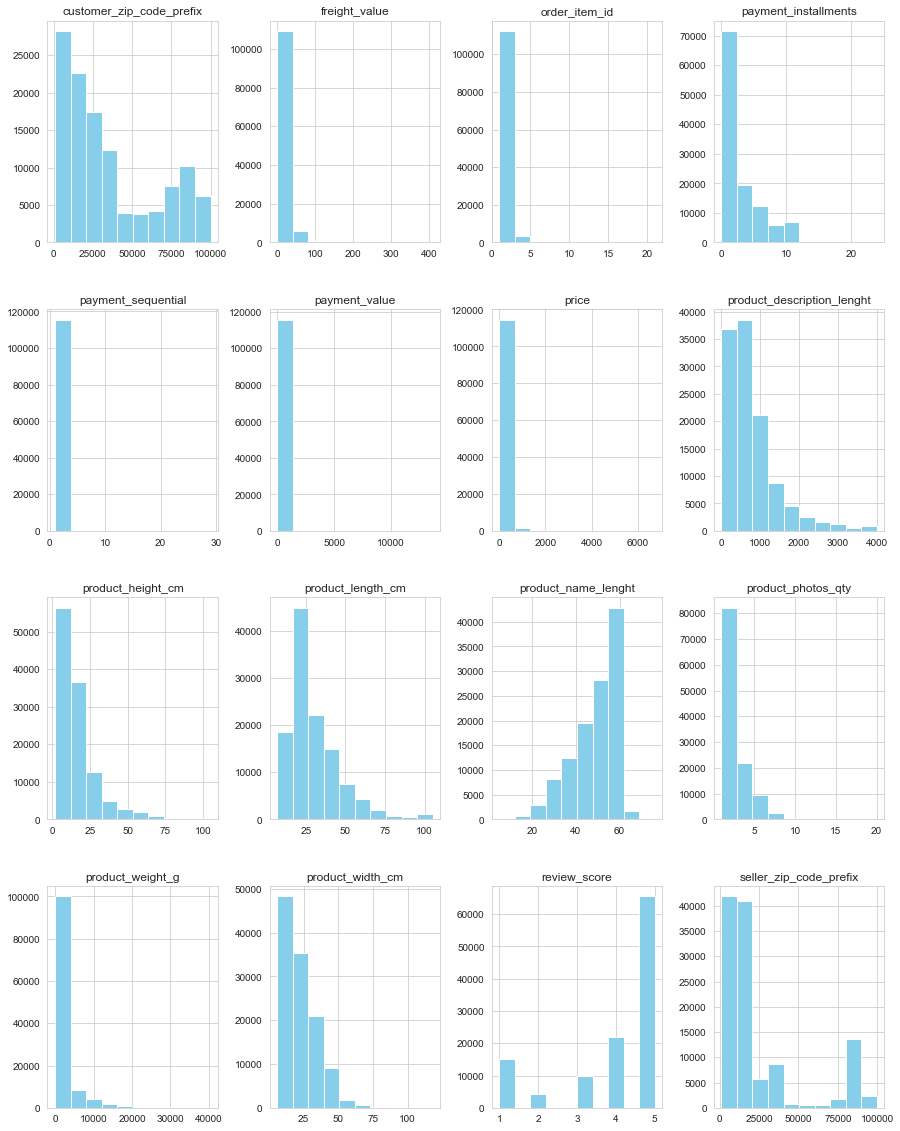

In [51]:
df.hist(figsize=(15, 20), color="skyblue")

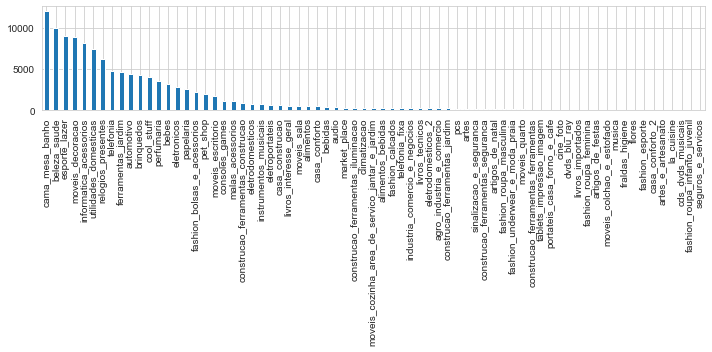

In [41]:
plt.figure(figsize=(10, 5))

df["product_category_name"].value_counts().plot(kind="bar")
plt.tight_layout()
plt.show()

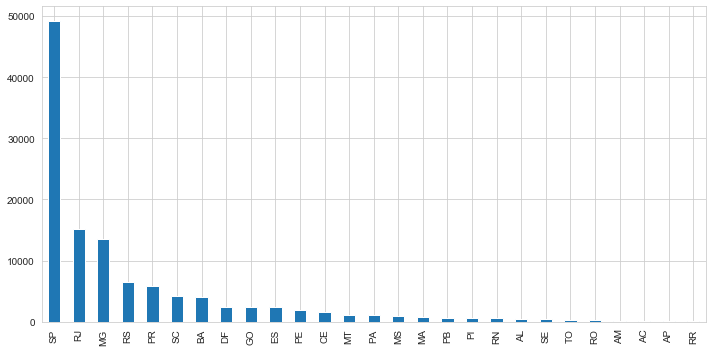

In [42]:
plt.figure(figsize=(10, 5))
df["customer_state"].value_counts().plot(kind="bar")
plt.tight_layout()
plt.show()

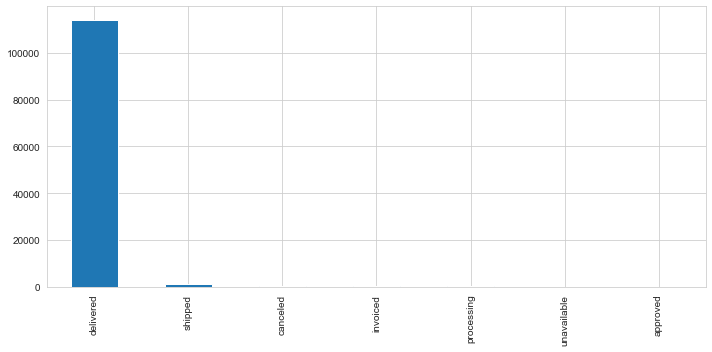

In [43]:
plt.figure(figsize=(10, 5))
df["order_status"].value_counts().plot(kind="bar")
plt.tight_layout()
plt.show()

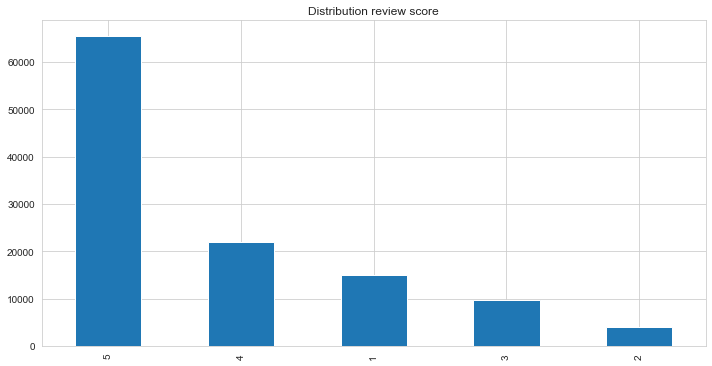

In [44]:
plt.figure(figsize=(10, 5))
df['review_score'].value_counts().plot(kind="bar")
plt.tight_layout()
plt.title("Distribution review score")
plt.show()

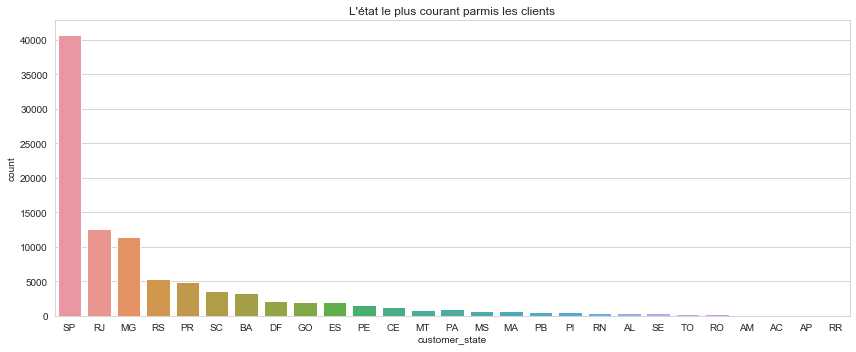

In [45]:
customer_state_count_df = df.groupby(['customer_id', 'customer_state']).count().reset_index()

plt.figure(figsize=(12, 5))
sns.countplot(customer_state_count_df.customer_state, order=df.customer_state.value_counts().index)
plt.title("L'état le plus courant parmis les clients")
plt.tight_layout()
plt.show()

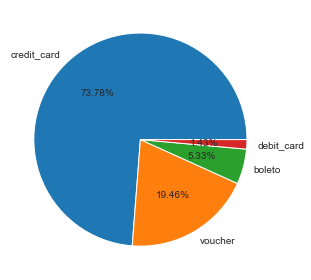

In [46]:
plt.pie(df["payment_type"].value_counts(), labels=df["payment_type"].unique(), autopct="%.2f%%", radius=1)
plt.tight_layout()
plt.show()

#### Analyse multi-varié

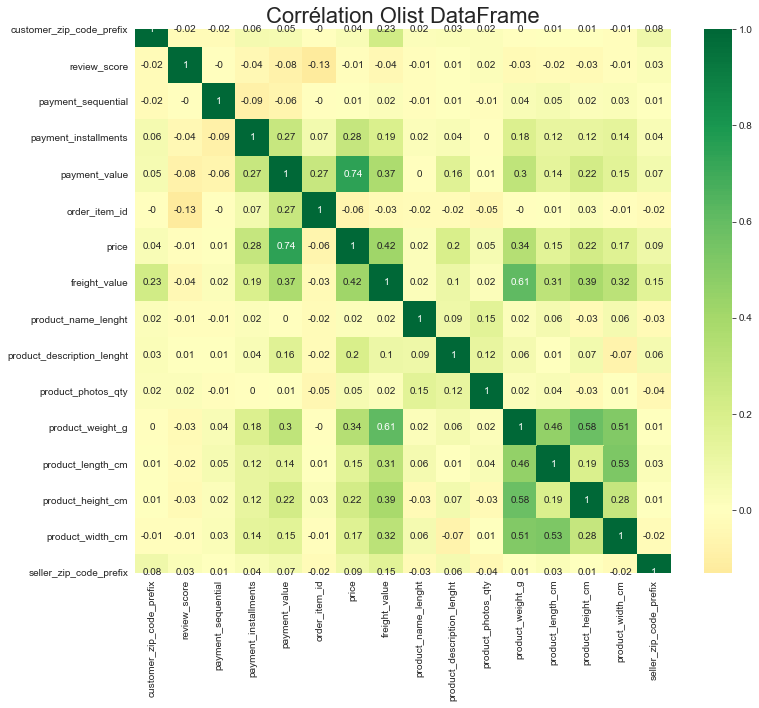

In [47]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr().round(2), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title("Corrélation Olist DataFrame", fontsize=22)
plt.show()

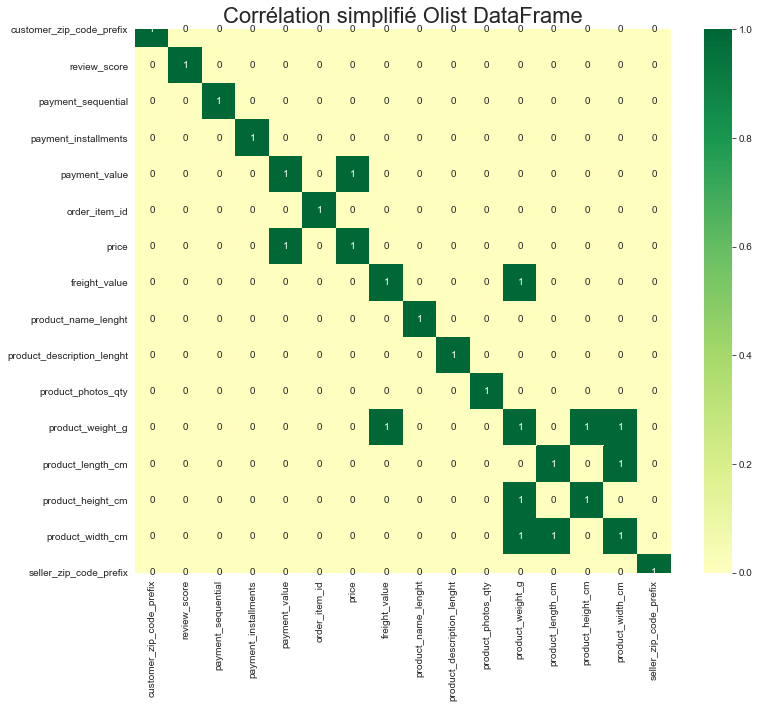

In [48]:
plt.figure(figsize=(12, 10))
sns.heatmap(abs(df.corr().round(2)) > 0.5, xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title("Corrélation simplifié Olist DataFrame", fontsize=22)
plt.show()

In [52]:
mean_price_vs_order_df = df.groupby(['order_id']).mean()['price'].reset_index()